In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [3]:
# Bước 1. Tải dữ liệu phân loại từ scikit-learn

In [4]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
dataset_name="Breast Cancer"

In [5]:
# Buoc 2. Kham pha du lieu
print(f"Thong tin ve tap du lieu {dataset_name}")
print(f"So mau: {X.shape[0]}")
print(f"So dac trung: {X.shape[1]}")
print(f"Ten cac lop: {cancer.target_names}")
print(f"Phan phoi cac lop: {np.bincount(y)}")

Thong tin ve tap du lieu Breast Cancer
So mau: 569
So dac trung: 30
Ten cac lop: ['malignant' 'benign']
Phan phoi cac lop: [212 357]


In [6]:
print(X.head(5))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [7]:
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
# BUowsc 3: Phan chia du lieu thanh tap huan luyen va tap kiem tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nKich thuoc tap huan luyen: {X_train.shape}")
print(f"\nKich thuoc tap test: {X_test.shape}")


Kich thuoc tap huan luyen: (426, 30)

Kich thuoc tap test: (143, 30)


In [9]:
# Buoc 4: Chuan hoa du lieu (quan trong cho Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Buoc 5: Xay dung mo hinh hoi quy logistic
model = LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs", random_state=42)

In [11]:
# Buoc 6: Huan luyen mo hinh
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Buoc 7: Kiem tra he so hoi quy
coef_df = pd.DataFrame({'Dac trung':X.columns, 'He so' : model.coef_[0]})
print("\nHe so hoi quy logistic:")
print(coef_df.sort_values(by="He so", ascending=False))
print(f"He so chan (Intercept): {model.intercept_[0]:.4f}")


He so hoi quy logistic:
                  Dac trung     He so
5          mean compactness  0.694230
15        compactness error  0.616426
18           symmetry error  0.425102
19  fractal dimension error  0.374882
11            texture error  0.260714
16          concavity error  0.154108
9    mean fractal dimension  0.083713
25        worst compactness  0.046587
8             mean symmetry -0.126233
14         smoothness error -0.145583
29  worst fractal dimension -0.209568
4           mean smoothness -0.301007
17     concave points error -0.343986
2            mean perimeter -0.483691
12          perimeter error -0.491072
1              mean texture -0.518670
0               mean radius -0.523064
3                 mean area -0.557334
6            mean concavity -0.565443
24         worst smoothness -0.669648
7       mean concave points -0.676929
22          worst perimeter -0.721168
26          worst concavity -0.796758
20             worst radius -0.917480
23               worst ar

In [13]:
# Buoc 8: Du doan xac suat lop tren tap kiem tra
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)

In [14]:
# Buoc 9: Danh gia mo hinh
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print("\nDanh gia mo hinh:")
print(f"Do chinh xac (Accuracy): {accuracy:.4f}")
print("\nMa tran nham lan:")
print(conf_matrix)
print("\nBao cao phan loai:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Danh gia mo hinh:
Do chinh xac (Accuracy): 0.9860

Ma tran nham lan:
[[52  1]
 [ 1 89]]

Bao cao phan loai:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



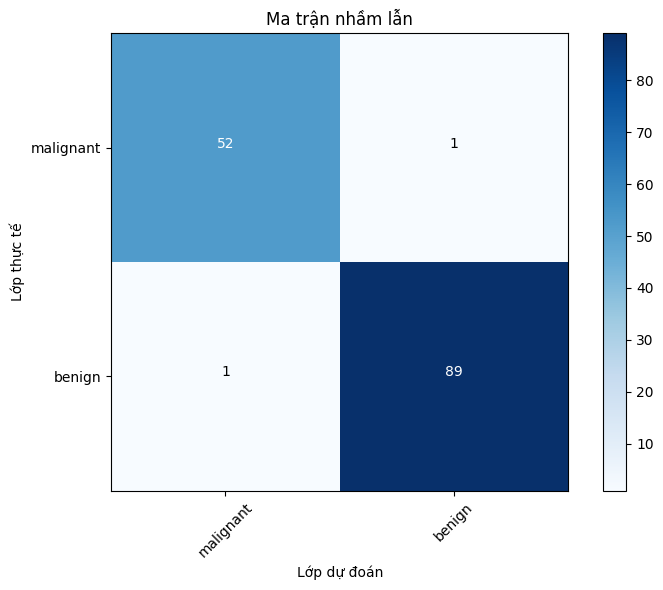

In [16]:
# Bước 10: Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Ma trận nhầm lẫn')
plt.colorbar()
tick_marks = np.arange(len(cancer.target_names))
plt.xticks(tick_marks, cancer.target_names, rotation=45)
plt.yticks(tick_marks, cancer.target_names)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Lớp thực tế')
plt.xlabel('Lớp dự đoán')
plt.tight_layout()
plt.show()

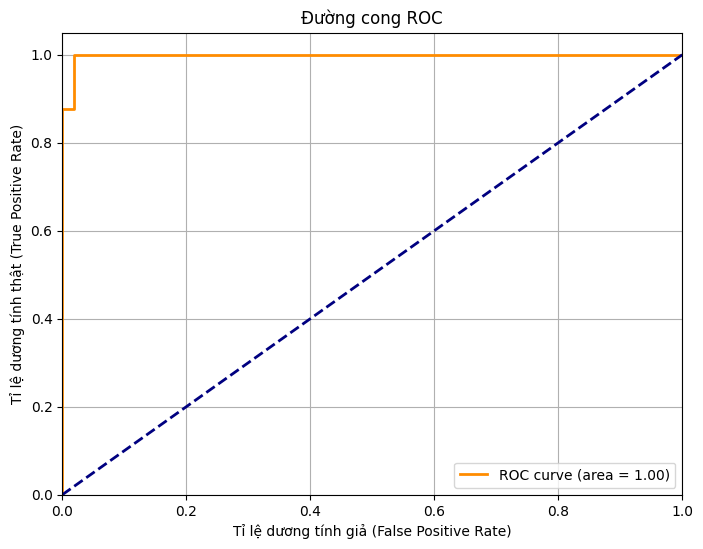

In [17]:
# Bước 11: Vẽ đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỉ lệ dương tính giả (False Positive Rate)')
plt.ylabel('Tỉ lệ dương tính thật (True Positive Rate)')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

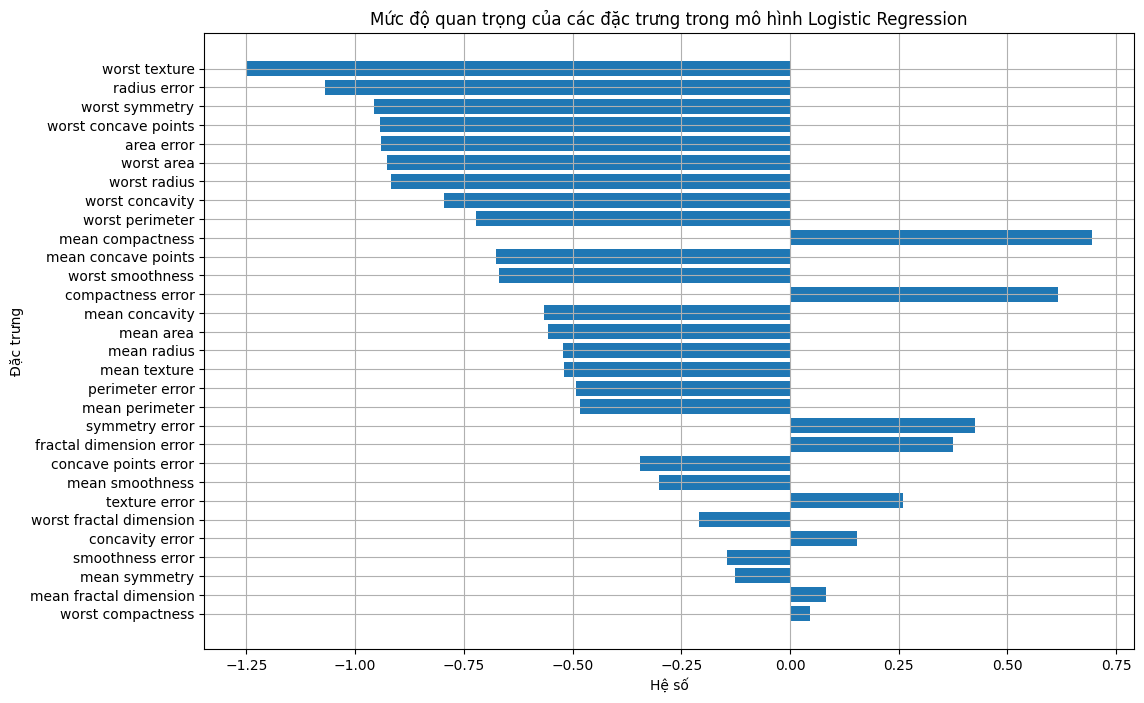

In [18]:
# Buoc 12: Phan tich dac qaun trong nhat
plt.figure(figsize=(12, 8))
coef_df = coef_df.sort_values(by='He so', key=abs)
plt.barh(coef_df['Dac trung'], coef_df['He so'])
plt.xlabel('Hệ số')
plt.ylabel('Đặc trưng')
plt.title('Mức độ quan trọng của các đặc trưng trong mô hình Logistic Regression')
plt.grid(True)
plt.show()

In [19]:
from sklearn import datasets  

# Phương pháp 1: In trực tiếp  
print(dir(datasets))  

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'data', 'descr', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_fr